In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import pandas as pd

In [3]:
uav = np.genfromtxt('../PhD/python-phd/guy_auv/is6_50cm_auv_draft_sipexgrid.txt')

In [4]:
uav[0]

array([ 179.71 ,  -57.282,      nan,      nan])

In [5]:
uav[1:10,1]

array([-56.783, -56.283, -55.784, -55.284, -54.785, -54.285, -53.786,
       -53.286, -52.787])

In [6]:
print('min X: {} max X: {}'.format(np.min(uav[:,0]), np.max(uav[:,0])))

min X: -168.48 max X: 194.32


In [7]:
print('min Y: {} max Y: {}'.format(np.min(uav[:,1]), np.max(uav[:,1])))

min Y: -57.282 max Y: 299.3


In [8]:
uav = uav[:,0:3]

In [9]:
uav.shape

(478130, 3)

In [10]:
uav_subset = uav[(uav[:,0] >= -150) & (uav[:,0] <= 130) & (uav[:,1] >= -30) & (uav[:,1] <= 275) ]
uav_subset[:,0] = uav_subset[:,0] - min(uav_subset[:,0])
uav_subset[:,1] = uav_subset[:,1] - min(uav_subset[:,1])

(-50.0, 300.0, -50.0, 350.0)

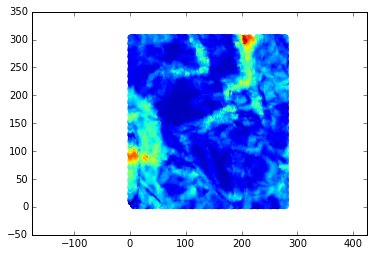

In [11]:
plt.scatter(uav_subset[:,0], uav_subset[:,1], c=uav_subset[:,2], lw=0)
plt.axis('equal')

In [12]:
lidar= np.genfromtxt('../PhD/is6_f11/python_zi/is6_f11_pass1_aa_nr2_522816_523019_c_zi.xyz', skip_header=1)

In [13]:
lidar

array([[  5.22817123e+05,   1.38148000e+02,  -5.98555100e+03, ...,
          1.41660000e-01,   0.00000000e+00,   8.13200000e-02],
       [  5.22817153e+05,   1.30017000e+02,  -5.98551600e+03, ...,
          1.33110000e-01,   2.69310000e-01,   7.64100000e-02],
       [  5.22817153e+05,   1.30758000e+02,  -5.98539200e+03, ...,
          1.34340000e-01,   4.15070000e-01,   7.71100000e-02],
       ..., 
       [  5.22989640e+05,  -1.77194000e+02,   2.51923600e+03, ...,
          2.10050000e-01,   0.00000000e+00,   1.20570000e-01],
       [  5.22989640e+05,  -1.75802000e+02,   2.51940900e+03, ...,
          2.08830000e-01,   0.00000000e+00,   1.19870000e-01],
       [  5.22989640e+05,  -1.74408000e+02,   2.51958400e+03, ...,
          2.07610000e-01,   0.00000000e+00,   1.19170000e-01]])

In [14]:
np.max(lidar[:,2])

2519.721

In [15]:
lidar_subset = lidar[(lidar[:,1] >= -150) & (lidar[:,1] <= 130) & (lidar[:,2] >= -30) & (lidar[:,2] <= 275) ]
lidar_subset[:,1] = lidar_subset[:,1] - min(lidar_subset[:,1])
lidar_subset[:,2] = lidar_subset[:,2] - min(lidar_subset[:,2])
lidar_subset

array([[  5.22939098e+05,   2.79924000e+02,   6.90000000e-02, ...,
          1.59980000e-01,   8.22720000e-01,   9.18300000e-02],
       [  5.22939128e+05,   2.70263000e+02,   1.11000000e-01, ...,
          1.51430000e-01,   7.16560000e-01,   8.69200000e-02],
       [  5.22939128e+05,   2.71395000e+02,   2.37000000e-01, ...,
          1.52650000e-01,   8.01960000e-01,   8.76200000e-02],
       ..., 
       [  5.22945798e+05,   1.00320000e+01,   3.04663000e+02, ...,
          1.62420000e-01,   4.93730000e-01,   9.32300000e-02],
       [  5.22945798e+05,   1.12580000e+01,   3.04857000e+02, ...,
          1.61200000e-01,   5.08490000e-01,   9.25300000e-02],
       [  5.22945828e+05,   2.98000000e-01,   3.04943000e+02, ...,
          1.72190000e-01,   4.12780000e-01,   9.88400000e-02]])

(-50.0, 300.0, -50.0, 350.0)

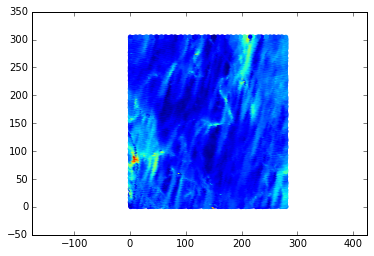

In [16]:
plt.scatter(lidar_subset[:,1], lidar_subset[:,2], c=lidar_subset[:,3], lw=0)
plt.axis('equal')

In [17]:
from compute_zi_functions import compute_zi, compute_zs

In [18]:
d_snow = 326.31
#d_snow = 305.67 #mean of all EA obs
sd_dsnow = 10
d_ice = 922.4 #empirically derived from matching with AUV draft
sd_dice = 10
d_water = 1028 #Hutchings2015
sd_dwater = 1

#sipex2 snow model
s_i = ([0.701, -0.0012])

zs, zs_uncert = compute_zs(lidar_subset[:,3], s_i, 0.1)

zi, zi_uncert = compute_zi(lidar_subset[:,3], zs, d_ice, d_water, d_snow, 0.1,
                           zs_uncert, sd_dsnow, sd_dice, sd_dwater)

lidar_draft =np.abs(lidar_subset[:,3] - (zs + zi))

In [19]:
from scipy.interpolate import griddata

In [20]:
grid_x = np.arange(np.floor(min(lidar_subset[:,1])),np.ceil(max(lidar_subset[:,1])), 1.0)
grid_y = np.arange(np.floor(min(lidar_subset[:,2])),np.ceil(max(lidar_subset[:,2])), 1.0)

#grid_x = np.arange(0,np.ceil(max(lidar_subset[:,0]))-np.floor(min(lidar_subset[:,0])), 0.5)
#grid_y = np.arange(0,np.ceil(max(lidar_subset[:,1]))-np.floor(min(lidar_subset[:,1])), 0.5)

xx, yy = np.meshgrid(grid_x, grid_y)
np.min(yy)
np.max(yy)

304.0

In [85]:
from matplotlib.mlab import griddata as gd

g_lidar = gd(lidar_subset[:,1], lidar_subset[:,2], lidar_draft, grid_x,grid_y, interp='linear')
g_elev = gd(lidar_subset[:,1], lidar_subset[:,2], lidar_subset[:,3], grid_x,grid_y, interp='linear')

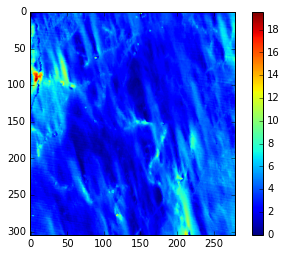

In [86]:
plt.imshow(g_lidar)
plt.colorbar()

In [87]:
uav_subset = uav_subset[~np.isnan(uav_subset).any(1)]

In [88]:
len(uav_subset[:,2])

338334

In [89]:
uav_subset[:,2]

array([ 5.2392,  5.3583,  5.2709, ...,  3.1457,  3.0108,  2.8692])

In [90]:
np.max(yy)

304.0

In [91]:
g_auv = griddata(uav_subset[:,0:2], uav_subset[:,2], (xx, yy), method='nearest')


### A quick sanity check

In [61]:
print('mean AUV draft: {}, mean liDAR draft: {}'.format(np.mean(g_auv), np.mean(g_lidar)))

mean AUV draft: 3.2808243624685005, mean liDAR draft: 3.4757542934081975


In [62]:
print('std AUV draft: {}, std liDAR draft: {}'.format(np.std(g_auv), np.std(g_lidar)))

std AUV draft: 1.9975789329529452, std liDAR draft: 1.6926844244498735


#### OK, not quite matching but well within 1-sigma.

## Plotting the two grids for an eyeball comparison

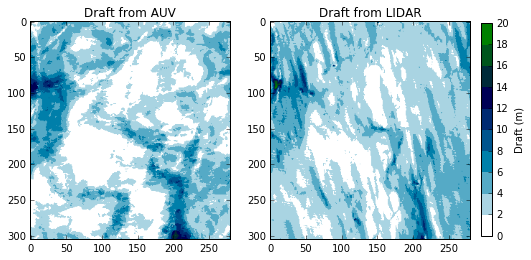

In [63]:
import matplotlib as mpl
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=20)

cmap = plt.get_cmap('ocean_r', 10)

fig = plt.figure(figsize = ([20/2.54, 10/2.54]), dpi=300)

ax0 = fig.add_subplot(121)
g0 = ax0.imshow(g_auv, cmap=cmap, vmin=0, vmax=20)
ax0.set_title('Draft from AUV')

#cbaxes0 = fig.add_axes([0.48, 0.14, 0.02, 0.75]) 
#cb0 = plt.colorbar(g0, cax=cbaxes0, cmap=cmap)
#cb0.ax.set_ylabel('Draft (m)', rotation=90)


ax1 = fig.add_subplot(122)
g1 = ax1.imshow(g_lidar, cmap=cmap, vmin=0, vmax=20)
ax1.set_title('Draft from LIDAR')

cbaxes1 = fig.add_axes([0.92, 0.14, 0.02, 0.75]) 
cb1 = plt.colorbar(g1, cax=cbaxes1, cmap=cmap)
cb1.ax.set_ylabel('Draft (m)', rotation=90)



## Two datasets on a common grid - what are the differences?

### difference map

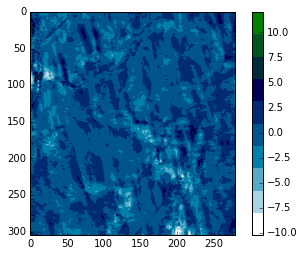

In [64]:
cmap = plt.get_cmap('ocean_r', 10)
norm = mpl.colors.Normalize(vmin=-10, vmax=10)

plt.imshow(g_lidar- g_auv, cmap=cmap)
plt.colorbar(cmap=cmap)

This is quite interesting. At about [10, 80] (grid coords) there's a peaky ridge which was split by a crack. Here, the LiDAR draft 'peak'is offset a little from the AUV - it's basically captured the leftmoast (grid view) peak but not the part on the right side of the crack. So there are large differences each side of the narrow ridge picked on by LiDAR. This pattern is going to be seen a lot - it's clear (and well known) that keel systems are often wider than ridges.

The ridge/keel system roughly along X=[150 -> 200] is better represented, but still narrower (and less deep) in the LiDAR-based model. The keel system between X=[100 -> 150] and y = [250 -> 300] is really not seen at all in the LiDAR based model, although it's still significant (to 6m deep!)

## Normalising the data to see if interpretation is any easier

short answer: no.

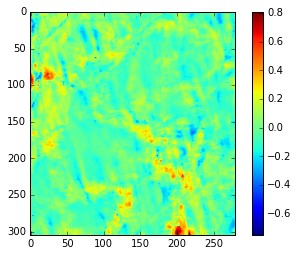

In [65]:
g2_auv = g_auv-np.mean(g_auv)
g2_lidar = g_lidar-np.mean(g_lidar)
plt.imshow(g2_auv/np.max(g2_auv) - g2_lidar/np.max(g2_lidar))
plt.colorbar()

### let's put all that into one figure:

/Users/arcturus/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


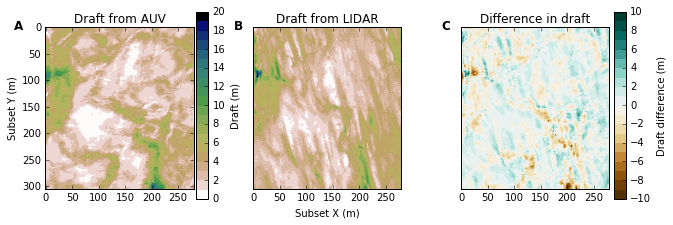

In [228]:
cmap = plt.get_cmap('gist_earth_r', 20)


ytks = np.arange(-50,300,50)
xtks = np.arange(-150,150,50)


fig = plt.figure(figsize = ([22/2.54, 10/2.54]), dpi=300)

ax0 = fig.add_subplot(131)
g0 = ax0.imshow(g_auv, cmap=cmap, vmin=0, vmax=20.1)
ax0.set_title('Draft from AUV')
ax0.set_ylabel('Subset Y (m)')
ax0.text(-0.18, 1.01,'A', ha='center', va='center', transform=ax0.transAxes, fontsize=12, weight='bold')
#ax0.set_yticks(ytks)
#ax0.set_xlim([-150,130])
#ax0.set_ylim([-30,275])
#ax0.set_xticklabels(xtks[::-1])

#ax0.set_yticklabels(ytks[::-1])

ax1 = fig.add_subplot(132)
g1 = ax1.imshow(g_lidar, cmap=cmap, vmin=0, vmax=20)
ax1.set_title('Draft from LIDAR')
ax1.set_xlabel('Subset X (m)')
#ax1.set_xlim([-150,130])
#ax1.set_ylim([-30,275])



cbaxes1 = fig.add_axes([0.32, 0.18, 0.02, 0.66]) 
cb1 = plt.colorbar(g1, cax=cbaxes1, cmap=cmap)
cb1.ax.set_ylabel('Draft (m)', rotation=90)
ax1.set_yticks([])
ax1.text(-0.1, 1.005,'B', ha='center', va='center', transform=ax1.transAxes, fontsize=12, weight='bold')

cmap = plt.get_cmap('BrBG', 20)

diff = g_lidar-g_auv

ax2 = fig.add_subplot(133)
ax2.set_yticks([])
g2 = ax2.imshow(diff, cmap=cmap, vmin=-10, vmax=10)
ax2.set_title('Difference in draft')
cbaxes2 = fig.add_axes([0.99, 0.18, 0.02, 0.66]) 
cb2 = plt.colorbar(g2, cax=cbaxes2, cmap=cmap)
cb2.ax.set_ylabel('Draft difference (m)', rotation=90)
ax2.set_yticks([])
ax2.text(-0.1, 1.01,'C', ha='center', va='center', transform=ax2.transAxes, fontsize=12, weight='bold')


plt.tight_layout()
fig.subplots_adjust(wspace=0.4)


plt.savefig('draft_diffs.pdf', bbox_inches='tight')

### Another new thesis figure is born!
In panel C here, 'blue' means that LiDAR-derived draft is deeper than AUV draft, and 'brown' means that AUV draft is deeper than LiDAR-derived draft. We pretty much see the snow dune pattern reflected here - pretty linear features where LiDAR draft is deeper. We also see the well documented 'keels are wider than ridges' feature. Ridge *peaks* provide deep, pointy, narrow keels from LiDAR - but AUV draft obs reveal broader keels. 

## Actually let's do some simple maths.
- what is the correlation between draft(AUV) and draft(LIDAR)
- what is the correlation between surface(LIDAR) and draft(AUV)
- what is the correlation between surface(LIDAR) and draft(LiDAR)

In [67]:
import pandas as pd

arr_s = np.shape(g_lidar)

g_l_1d = np.reshape(g_lidar, (arr_s[0]*arr_s[1],1))
g_a_1d = np.reshape(g_auv, (arr_s[0]*arr_s[1],1))
g_e_1d = np.reshape(g_elev, (arr_s[0]*arr_s[1],1))

keepthis = np.where(~np.isnan(g_l_1d))

g_l_1d = g_l_1d[keepthis]
g_a_1d = g_a_1d[keepthis]
g_e_1d = g_e_1d[keepthis]

df2 = pd.DataFrame(g_l_1d,columns=['d_l'])
df2['d_a'] = g_a_1d
df2['e'] = g_e_1d

#nonparametric spearman's R
sprmn_r_ld_ad = df2['d_l'].corr(df2['d_a'], method='spearman')
sprmn_r_e_ad = df2['e'].corr(df2['d_a'], method='spearman')
sprmn_r_e_ld = df2['e'].corr(df2['d_l'], method='spearman')


In [68]:
print('Spearmans R for LiDAR draft -> AUV draft: {}, LiDAR elevation -> AUV draft: {},\
       and LiDAR elevation to LiDAR draft: {}'.format(sprmn_r_ld_ad, sprmn_r_e_ad, sprmn_r_e_ld))

Spearmans R for LiDAR draft -> AUV draft: 0.6846494950592295, LiDAR elevation -> AUV draft: 0.6846494923484168,       and LiDAR elevation to LiDAR draft: 0.9999999999939424


LiDAR and AUV draft are fairly highly correlated, which is a win. What's the correlation between draft and topography from SIPEX-II IS6? Better check...

In [69]:
is6holes = np.genfromtxt('/Users/arcturus/Documents/PhD/is6_f11/auv_lidar/is6.csv', delimiter = ',')
is6zs = is6holes[:,4]
is6tf = is6holes[:,3] + is6holes[:,4]
is6fi = is6holes[:,3]
is6draft = is6holes[:,5]

this = np.where(~np.isnan(is6draft))

df3 = pd.DataFrame(is6draft[this], columns=['draft'])
df3['tf'] = is6tf[this]
df3['zs'] = is6zs[this]
sprmn_r_tf_d = df3['tf'].corr(df3['draft'], method='spearman')
print('Spearmans R for in situ total freeboard and draft: {}'.format(sprmn_r_tf_d))

Spearmans R for in situ total freeboard and draft: -0.30206503700803733


In [70]:
sprmn_r_tf_d = df3['tf'].corr(df3['zs'], method='spearman')
print('Spearmans R for in situ total freeboard and snow depth: {}'.format(sprmn_r_tf_d))

Spearmans R for in situ total freeboard and snow depth: 0.8346499889820734


So where the transect line shows a weak **negative** correlation between total freeboard and draft, a broader picture says well, actually, the correspondence between surface and under-ice world is relatively strong. This really points to the sampling bias of existing drill holes. Hmm.

### but is the correlation useful?
What an R value tells us is that a linear relationship can be stuck over a scatterplot of two values and generally describe the trend which we can see. But - it doesn't right away tell us how useful it is to say 'we can reliably predict Y from X using some linear relationship'.

So, lets have a look at how good choosing a draft for an elevation is. In situ observations tell us that it will be difficult.

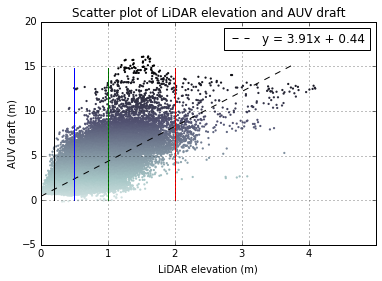

In [197]:
y_ax = np.arange(0,15,0.2)
x_ax = np.arange(0,4,0.2)
line1 = np.zeros_like(y_ax)
line1[:] = 0.2
line2 = np.ones_like(y_ax)
line2[:] = 0.5
line3 = np.ones_like(y_ax)
line3[:] = 1.0
line4 = np.ones_like(y_ax)
line4[:] = 2.0

fit = np.polyfit(g_e_1d,g_a_1d,1)
fit_fn = np.poly1d(fit)
f_s,f_i = np.polyfit(g_e_1d,g_a_1d,1)

plt.scatter(g_e_1d, g_a_1d, lw=0, s=5, c=g_a_1d, cmap='bone_r', vmin=-2, vmax=15)
plt.plot(x_ax,fit_fn(x_ax), 'k--', label = 'y = {:02.2f}x + {:02.2f}'.format(f_s, f_i))

plt.ylabel('AUV draft (m)')
plt.xlabel('LiDAR elevation (m)')
plt.plot(line1,y_ax, 'k')
plt.plot(line2,y_ax, 'b')
plt.plot(line3,y_ax, 'g')
plt.plot(line4,y_ax, 'r')

plt.grid()
plt.xlim([0, 5])
the_xtix = np.arange(0,5,1)
plt.xticks(the_xtix)
#plt.axis('equal')
plt.title('Scatter plot of LiDAR elevation and AUV draft')
plt.legend(loc=0)
#plt.tight_layout()


plt.savefig('ch4_elevation_v_draft.pdf', bbox_inches='tight')
plt.savefig('ch4_elevation_v_draft.png', bbox_inches='tight')

This plot shows a great linear relationship! But, as we can see from the four vertical lines, we have many choices of draft for a given elevation.

The black line at e = 0.2m has relatively few choices. In the 1-2 m range, there are a few metres worth of draft for any given elevation. Above about 2 m elevation (or total freeboard) things get more reliable.

A linear fit to our data gives a slope of 3.9, conveniently close to published *R* values.

In [176]:
print('slope: {}, intercept: {}'.format(f_s, f_i))

slope: 3.9114854628307563, intercept: 0.43543774607263896


But a mean ratio of draft to elevation ratio (a proper *R*) for these data is higher:

In [175]:
np.mean(g_a_1d/g_e_1d)

4.8856141872589554

## Segmenting by roughness

What are useful analyses here. I'm not sure. There are not enough data to say anything really. There are two ridge systems reasonable well represented, so I could look at relative area of 'smooth' ice for the top surfaces in 3D. Surely there is literature about it from drill holes too. But what will we find here? Probably the same as Doble et al. (2011), or reinforcing ch2's finding that it's not all that precise.

There is already built a proxy for roughness - standard deviation of 11m diameter neighbourhooods about each point. So that's a good start point.

In [177]:
#call in a premade roughness proxy..
r= np.genfromtxt('../PhD/is6_f11/python_zi/is6_f11_pass1_aa_nr2_522816_523019_crproxy.xyz', skip_header=1)

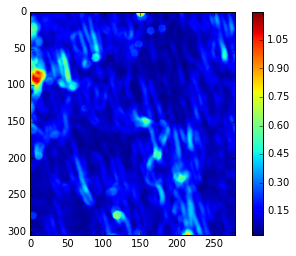

In [178]:
#subset the data
r_subset = r[(r[:,1] >= -150) & (r[:,1] <= 130) & (r[:,2] >= -30) & (r[:,2] <= 275) ]
r_subset[:,1] = r_subset[:,1] - min(r_subset[:,1])
r_subset[:,2] = r_subset[:,2] - min(r_subset[:,2])

#grid the data
g_rproxy = gd(r_subset[:,1], r_subset[:,2], r_subset[:,5], grid_x,grid_y, interp='linear')
g_rproxy_1d = np.reshape(g_rproxy, (arr_s[0]*arr_s[1],1))

g_rproxy_1d = g_rproxy_1d[keepthis]

plt.imshow(g_rproxy)
plt.colorbar()

In [179]:
rough = np.where(g_rproxy_1d > np.nanmedian(g_rproxy_1d))
smooth = np.where(g_rproxy_1d <= np.nanmedian(g_rproxy_1d))

rgh_g = np.where(g_rproxy > np.nanmedian(g_rproxy))
smth_g = np.where(g_rproxy <= np.nanmedian(g_rproxy))

In [180]:
print("mean rough ice draft (AUV): {} ({}), mean smooth ice draft (AUV): {} ({})".format(np.mean(g_a_1d[rough]),
                                                                                         np.std(g_a_1d[rough]),
                                                                                         np.mean(g_a_1d[smooth]),
                                                                                         np.std(g_a_1d[smooth])))

mean rough ice draft (AUV): 3.9325786209262406 (2.169977609066016), mean smooth ice draft (AUV): 2.6182067300980947 (1.5392444529152671)


In [181]:
print("mean rough ice TF: {} ({}), mean smooth ice TF: {} ({})".format(np.mean(g_e_1d[rough]),
                                                                       np.std(g_e_1d[rough]),
                                                                       np.mean(g_e_1d[smooth]),
                                                                       np.std(g_e_1d[smooth])))

mean rough ice TF: 0.8403852213065479 (0.3893411405859797), mean smooth ice TF: 0.6117254698497688 (0.270729270241381)


### setting up all done.
Lets plot some rough and smooth ice regions

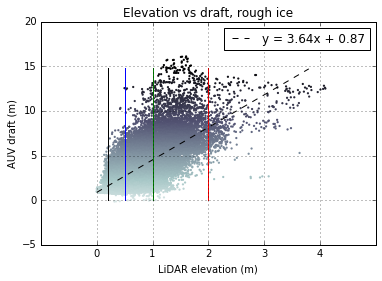

In [199]:
rfit = np.polyfit(g_e_1d[rough],g_a_1d[rough],1)
rfit_fn = np.poly1d(rfit)

x_ax = np.arange(0,4,0.2)
rf_s,rf_i = np.polyfit(g_e_1d[rough],g_a_1d[rough],1)

plt.scatter(g_e_1d[rough], g_a_1d[rough], lw=0, s=5, c=g_a_1d[rough], cmap='bone_r', vmin=-2, vmax=15)
plt.plot(x_ax, rfit_fn(x_ax), 'k--', label = 'y = {:02.2f}x + {:02.2f}'.format(rf_s, rf_i) )
plt.ylabel('AUV draft (m)')
plt.xlabel('LiDAR elevation (m)')
plt.plot(line1,y_ax, 'k')
plt.plot(line2,y_ax, 'b')
plt.plot(line3,y_ax, 'g')
plt.plot(line4,y_ax, 'r')
plt.title('Elevation vs draft, rough ice')
plt.grid()
#plt.xlim([-2, 17])
the_xtix = np.arange(0,5,1)
plt.xticks(the_xtix)
plt.legend(loc=0)
#plt.axis('equal')
plt.savefig('ch4_elevation_v_draft_rgh.pdf', bbox_inches='tight')
plt.savefig('ch4_elevation_v_draft_rgh.png', bbox_inches='tight')


In [230]:
print('slope: {}, intercept: {}'.format(rf_s, rf_i))

slope: 3.6398085238439433, intercept: 0.8737373291021852


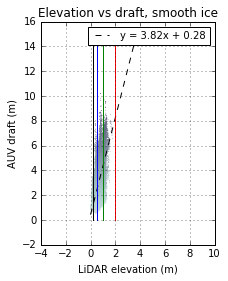

In [291]:
sfit = np.polyfit(g_e_1d[smooth],g_a_1d[smooth],1)
sfit_fn = np.poly1d(fit)

sf_s,sf_i = np.polyfit(g_e_1d[smooth],g_a_1d[smooth],1)


plt.scatter(g_e_1d[smooth], g_a_1d[smooth], lw=0, s=0.5, c=g_a_1d[smooth], cmap='bone_r', vmin=-2, vmax=15)
plt.plot(x_ax, sfit_fn(x_ax), 'k--', label = 'y = {:02.2f}x + {:02.2f}'.format(sf_s, sf_i) )
plt.ylabel('AUV draft (m)')
plt.xlabel('LiDAR elevation (m)')
plt.plot(line1,y_ax, 'k')
plt.plot(line2,y_ax, 'b')
plt.plot(line3,y_ax, 'g')
plt.plot(line4,y_ax, 'r')
plt.title('Elevation vs draft, smooth ice')
plt.grid()
plt.axis('scaled')
#the_xtix = np.arange(-10,20,2)
#plt.xticks(the_xtix)
#plt.yticks(the_xtix)
plt.xlim([-4, 10])
plt.ylim([-2, 16])
plt.legend(loc=1, fontsize=10)

plt.savefig('ch4_elevation_v_draft_smth.pdf', bbox_inches='tight')
plt.savefig('ch4_elevation_v_draft_smth.png', bbox_inches='tight')

In [208]:
print('slope: {}, intercept: {}'.format(sf_s, sf_i))

slope: 3.818260634339186, intercept: 0.28247944954807974


### so far:

- rough and smooth ice both have similar linear fits, with slopes near *R* (close to 4)
- rough ice is found at all LiDAR elevations
- smooth ice is in the lower proportion (below 2m freeboard)
- for most of the elevation range, there are a wide range of possible draft choices

Next - any relationship changes?

In [203]:
df_smth = pd.DataFrame(g_e_1d[smooth],columns=['tf'])
df_smth['d_a'] = g_a_1d[smooth]

In [204]:
sprmn_r_tf_d_smth = df_smth.tf.corr(df_smth.d_a, method='spearman')
print('Spearmans R for in situ total freeboard and draft, smooth ice: {}'.format(sprmn_r_tf_d_smth))

Spearmans R for in situ total freeboard and draft, smooth ice: 0.6796453525784808


In [205]:
df_rgh = pd.DataFrame(g_e_1d[rough],columns=['tf'])
df_rgh['d_a'] = g_a_1d[rough]

In [209]:
sprmn_r_tf_d_rgh = df_rgh.tf.corr(df_rgh.d_a, method='spearman')
print('Spearmans R for in situ total freeboard and draft, rough ice: {}'.format(sprmn_r_tf_d_rgh))

Spearmans R for in situ total freeboard and draft, rough ice: 0.6248125382590073


...pretty much not. Still a strong correlation, but we've just seen the caveats coming with that.

Next - what does AUV draft look like under smooth or rough ice?

In [210]:
g_l_r = griddata(uav_subset[:,0:2], uav_subset[:,2], (xx, yy), method='nearest')
g_l_r[smth_g]=0

g_l_s = griddata(uav_subset[:,0:2], uav_subset[:,2], (xx, yy), method='nearest')
g_l_s[rgh_g]=0

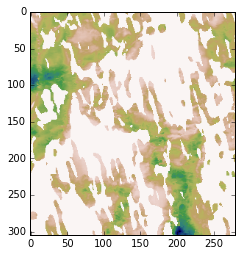

In [116]:
plt.imshow(g_l_r, cmap='gist_earth_r')

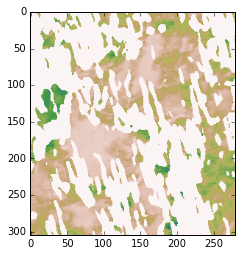

In [117]:
plt.imshow(g_l_s,  cmap='gist_earth_r')

/Users/arcturus/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


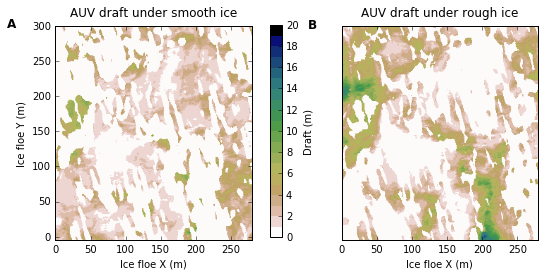

In [238]:
cmap = plt.get_cmap('gist_earth_r', 20)

ytks = np.arange(0,350,50)

fig = plt.figure(figsize = ([22/2.54, 10/2.54]), dpi=300)

ax0 = fig.add_subplot(121)
g0 = ax0.imshow(g_l_s, cmap=cmap, vmin=0, vmax=20.1)
ax0.set_title('AUV draft under smooth ice', y=1.02)
ax0.set_ylabel('Ice floe Y (m)')
ax0.text(-0.22, 1.01,'A', ha='center', va='center', transform=ax0.transAxes, fontsize=12, weight='bold')
ax0.set_yticks(ytks)
ax0.set_yticklabels(ytks[::-1])
ax0.set_xlabel('Ice floe X (m)')



ax1 = fig.add_subplot(122)
g1 = ax1.imshow(g_l_r, cmap=cmap, vmin=0, vmax=20)
ax1.set_title('AUV draft under rough ice', y=1.02)
ax1.set_xlabel('Ice floe X (m)')

cbaxes1 = fig.add_axes([0.48, 0.15, 0.02, 0.75]) 
cb1 = plt.colorbar(g1, cax=cbaxes1, cmap=cmap)
cb1.ax.set_ylabel('Draft (m)', rotation=90)
ax1.set_yticks([])
ax1.text(-0.15, 1.005,'B', ha='center', va='center', transform=ax1.transAxes, fontsize=12, weight='bold')

cmap = plt.get_cmap('BrBG', 20)

plt.tight_layout()
fig.subplots_adjust(wspace=0)

plt.savefig('draft_rough_smooth.pdf', bbox_inches='tight')

## Summary

For this patch of ice, total freeboard and draft are strongly but not so accurately correlated. Even if we split rough and smooth ice up, we get a strong Spearman's R - and that's shown in the generally linear trend if we plot elevations and drafts together. However, the data are incredibly scattered - the vertical lines we plotted earlier show that for most elevation values, a wide range of possible drafts exist. This reflects the composite nature of sea ice! For a given elevation, there are at least two variably-thick materials with different densities.

if we look at a proxy for surface roughness and separated 'rough' and 'smooth' ice, we see that smooth regions are generally lower, but the same caveats for relating surface topography and draft exist. Being, it's a minefield.

Rough ice on the surface generally corresponds with deeper drafts, which is convenient. 

## one more, making a 3 panel figure with all the scatterplots...

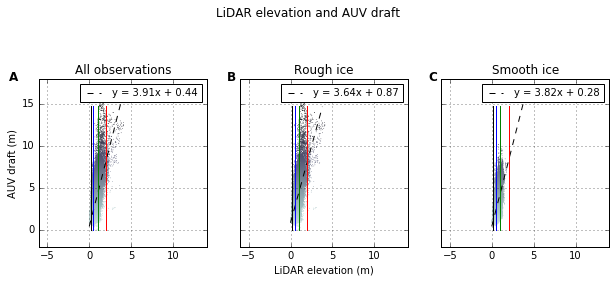

In [292]:
fig = plt.figure(figsize = ([22/2.54, 10/2.54]), dpi=300)

y_ax = np.arange(0,15,0.2)
x_ax = np.arange(0,4,0.2)
line1 = np.zeros_like(y_ax)
line1[:] = 0.2
line2 = np.ones_like(y_ax)
line2[:] = 0.5
line3 = np.ones_like(y_ax)
line3[:] = 1.0
line4 = np.ones_like(y_ax)
line4[:] = 2.0

fit = np.polyfit(g_e_1d,g_a_1d,1)
fit_fn = np.poly1d(fit)
f_s,f_i = np.polyfit(g_e_1d,g_a_1d,1)

ax0 = fig.add_subplot(131)
a0 = ax0.scatter(g_e_1d, g_a_1d, lw=0, s=0.5, c=g_a_1d, cmap='bone_r', vmin=-2, vmax=15)
ax0.plot(x_ax, fit_fn(x_ax), 'k--', label = 'y = {:02.2f}x + {:02.2f}'.format(f_s, f_i))
ax0.set_ylabel('AUV draft (m)')
#ax0.xlabel('LiDAR elevation (m)')
ax0.plot(line1,y_ax, 'k')
ax0.plot(line2,y_ax, 'b')
ax0.plot(line3,y_ax, 'g')
ax0.plot(line4,y_ax, 'r')
ax0.grid()
plt.axis('scaled')
ax0.set_xlim([-6, 14])
ax0.set_ylim([-2, 18])
plt.legend(loc=0, fontsize=10)
ax0.set_title('All observations')
ax0.text(-0.15, 1.01,'A', ha='center', va='center', transform=ax0.transAxes, fontsize=12, weight='bold')


ax1 = fig.add_subplot(132)
rfit = np.polyfit(g_e_1d[rough],g_a_1d[rough],1)
rfit_fn = np.poly1d(rfit)
x_ax = np.arange(0,4,0.2)
rf_s,rf_i = np.polyfit(g_e_1d[rough],g_a_1d[rough],1)
a1 = ax1.scatter(g_e_1d[rough], g_a_1d[rough], lw=0, s=0.5, c=g_a_1d[rough], cmap='bone_r', vmin=-2, vmax=15)
ax1.plot(x_ax, rfit_fn(x_ax), 'k--', label = 'y = {:02.2f}x + {:02.2f}'.format(rf_s, rf_i) )
#ax1.ylabel('AUV draft (m)')
ax1.set_xlabel('LiDAR elevation (m)')
ax1.plot(line1,y_ax, 'k')
ax1.plot(line2,y_ax, 'b')
ax1.plot(line3,y_ax, 'g')
ax1.plot(line4,y_ax, 'r')
ax1.set_title('Rough ice')
ax1.grid()
plt.axis('scaled')
ax1.set_xlim([-6, 14])
ax1.set_ylim([-2, 18])
ax1.set_yticklabels([])
plt.legend(loc=0, fontsize=10)
ax1.text(-0.05, 1.01,'B', ha='center', va='center', transform=ax1.transAxes, fontsize=12, weight='bold')

ax2 = fig.add_subplot(133)
sfit = np.polyfit(g_e_1d[smooth],g_a_1d[smooth],1)
sfit_fn = np.poly1d(fit)
sf_s,sf_i = np.polyfit(g_e_1d[smooth],g_a_1d[smooth],1)
a2 = ax2.scatter(g_e_1d[smooth], g_a_1d[smooth], lw=0, s=0.5, c=g_a_1d[smooth], cmap='bone_r', vmin=-2, vmax=15)
ax2.plot(x_ax, sfit_fn(x_ax), 'k--', label = 'y = {:02.2f}x + {:02.2f}'.format(sf_s, sf_i) )
ax2.plot(line1,y_ax, 'k')
ax2.plot(line2,y_ax, 'b')
ax2.plot(line3,y_ax, 'g')
ax2.plot(line4,y_ax, 'r')
ax2.set_title('Smooth ice')
ax2.grid()
plt.axis('scaled')
ax2.set_xlim([-6, 14])
ax2.set_ylim([-2, 18])
ax2.set_yticklabels([])
plt.legend(loc=0, fontsize=10)
ax2.text(-0.05, 1.01,'C', ha='center', va='center', transform=ax2.transAxes, fontsize=12, weight='bold')


plt.suptitle("LiDAR elevation and AUV draft", y=1.05, fontsize=12)

plt.tight_layout()
fig.subplots_adjust(wspace=0.2)


plt.savefig('elev_draft_rough_smooth.pdf', bbox_inches='tight')

